<a href="https://colab.research.google.com/github/VarshaPadmanaban/Projects/blob/main/Battey_Temperature_Management_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset (Replace 'battery_data.csv' with actual file if available)
df = pd.read_csv('/content/data.csv.zip')

# Simulate dataset (Replace this with real data)
np.random.seed(42)
num_samples = 1000

temperatures = np.random.uniform(20, 50, num_samples)  # Simulated temperatures
labels = np.array(["Normal" if t < 30 else "Air Cooling" if t < 38 else "Liquid Cooling" if t < 45 else "Shutdown" for t in temperatures])

# Encode labels to numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)  # Converts categorical labels to numbers

# Normalize temperature values
scaler = StandardScaler()
temperatures_scaled = scaler.fit_transform(temperatures.reshape(-1, 1))

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(temperatures_scaled, labels_encoded, test_size=0.2, random_state=42)

# Build the Deep Learning Model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(1,)),  # Input layer
    keras.layers.Dense(8, activation='relu'),  # Hidden layer
    keras.layers.Dense(len(np.unique(labels_encoded)), activation='softmax')  # Output layer (multi-class classification)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_data=(X_test, y_test))


# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mse = mean_squared_error(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred) # Defining conf_matrix

# Print evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2851 - loss: 1.3510 - val_accuracy: 0.5800 - val_loss: 1.2645
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5548 - loss: 1.2411 - val_accuracy: 0.5800 - val_loss: 1.1677
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6347 - loss: 1.1196 - val_accuracy: 0.6250 - val_loss: 1.0589
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6357 - loss: 1.0091 - val_accuracy: 0.6500 - val_loss: 0.9372
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6639 - loss: 0.9049 - val_accuracy: 0.6850 - val_loss: 0.8255
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6903 - loss: 0.7857 - val_accuracy: 0.7150 - val_loss: 0.7332
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7457 - loss: 0.6996 - val_accuracy: 0.7500 - val_loss: 0.6559
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7921 - loss: 0.6033 - val_accuracy: 0.8200 - val_loss: 0.5

KeyError: 'accuracy'

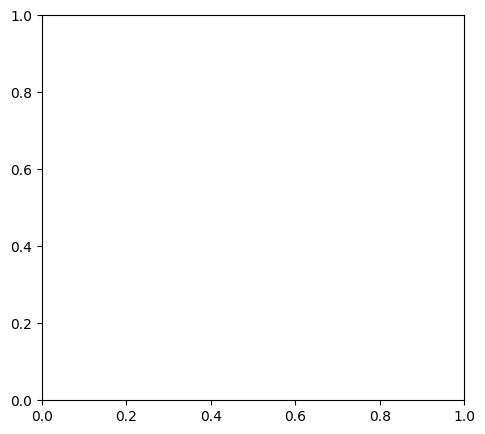

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Simulated training history (Replace with real model.history.history if available)
history = model.history.history

# Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history["accuracy"], label="Train Accuracy", marker="o")
plt.plot(history["val_accuracy"], label="Validation Accuracy", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history["loss"], label="Train Loss", marker="o", color='red')
plt.plot(history["val_loss"], label="Validation Loss", marker="s", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Epochs")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Plot Evaluation Metrics
metrics = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1, "MSE": mse}
plt.figure(figsize=(7, 5))
plt.bar(metrics.keys(), metrics.values(), color=["blue", "green", "purple", "orange", "red"])
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Model Evaluation Metrics")
plt.grid(axis="y")
plt.show()


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2544 - loss: 1.5098 - val_accuracy: 0.1350 - val_loss: 1.3637
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2075 - loss: 1.3208 - val_accuracy: 0.4550 - val_loss: 1.2355
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5704 - loss: 1.1852 - val_accuracy: 0.6250 - val_loss: 1.1084
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6408 - loss: 1.0580 - val_accuracy: 0.6550 - val_loss: 0.9616
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7012 - loss: 0.9070 - val_accuracy: 0.7100 - val_loss: 0.8166
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7194 - loss: 0.7662 - val_accuracy: 0.7650 - val_loss: 0.7022
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7868 - loss: 0.6590 - val_accuracy: 0.8000 - val_loss: 0.6094
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8272 - loss: 0.5773 - val_accuracy: 0.8600 - val_loss: 0.5

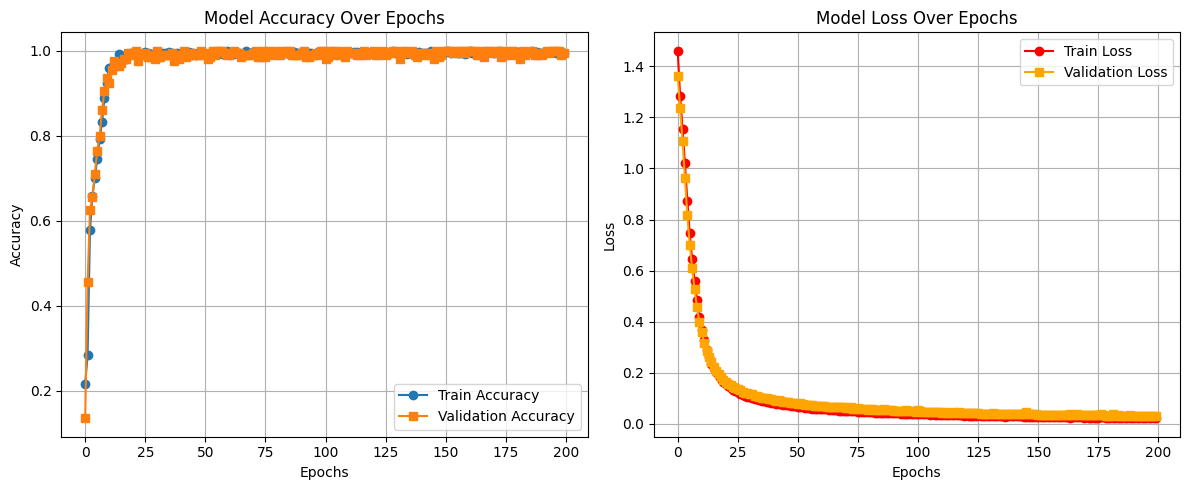

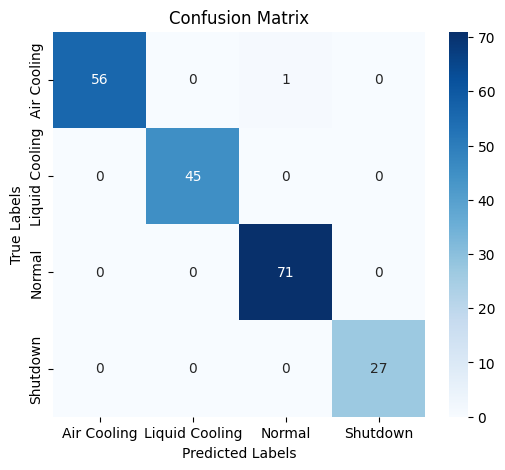

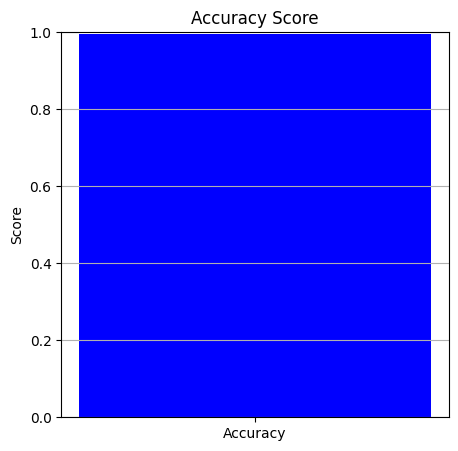

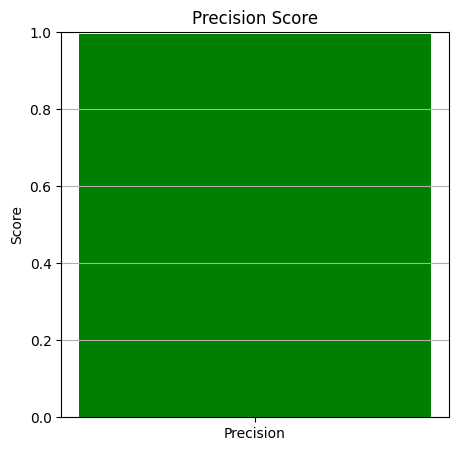

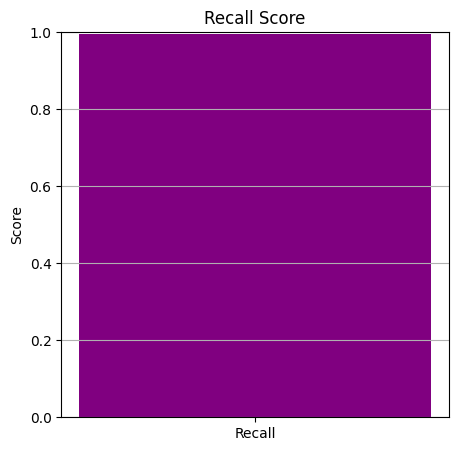

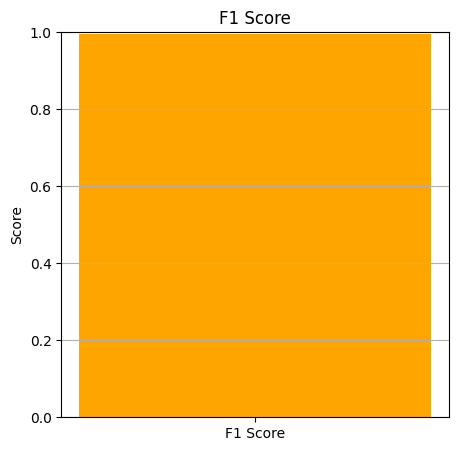

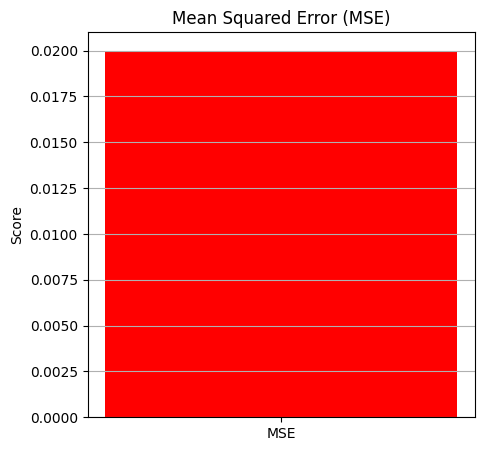

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset (Replace 'battery_data.csv' with actual file if available)
df = pd.read_csv('/content/data.csv.zip')

# Simulate dataset (Replace this with real data)
np.random.seed(42)
num_samples = 1000

temperatures = np.random.uniform(20, 50, num_samples)  # Simulated temperatures
labels = np.array(["Normal" if t < 30 else "Air Cooling" if t < 38 else "Liquid Cooling" if t < 45 else "Shutdown" for t in temperatures])

# Encode labels to numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)  # Converts categorical labels to numbers

# Normalize temperature values
scaler = StandardScaler()
temperatures_scaled = scaler.fit_transform(temperatures.reshape(-1, 1))

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(temperatures_scaled, labels_encoded, test_size=0.2, random_state=42)

# Build the Deep Learning Model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(1,)),  # Input layer
    keras.layers.Dense(8, activation='relu'),  # Hidden layer
    keras.layers.Dense(len(np.unique(labels_encoded)), activation='softmax')  # Output layer (multi-class classification)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1, validation_data=(X_test, y_test))
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract training history
history = model.history.history

# 1. Plot Accuracy & Loss Over Epochs
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history["accuracy"], label="Train Accuracy", marker="o")
plt.plot(history["val_accuracy"], label="Validation Accuracy", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history["loss"], label="Train Loss", marker="o", color='red')
plt.plot(history["val_loss"], label="Validation Loss", marker="s", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Epochs")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# 2. Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# 3. Plot Accuracy Score
plt.figure(figsize=(5, 5))
plt.bar(["Accuracy"], [accuracy], color="blue")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Accuracy Score")
plt.grid(axis="y")
plt.show()

# 4. Plot Precision Score
plt.figure(figsize=(5, 5))
plt.bar(["Precision"], [precision], color="green")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Precision Score")
plt.grid(axis="y")
plt.show()

# 5. Plot Recall Score
plt.figure(figsize=(5, 5))
plt.bar(["Recall"], [recall], color="purple")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Recall Score")
plt.grid(axis="y")
plt.show()

# 6. Plot F1 Score
plt.figure(figsize=(5, 5))
plt.bar(["F1 Score"], [f1], color="orange")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("F1 Score")
plt.grid(axis="y")
plt.show()

# 7. Plot Mean Squared Error (MSE)
plt.figure(figsize=(5, 5))
plt.bar(["MSE"], [mse], color="red")
plt.ylabel("Score")
plt.title("Mean Squared Error (MSE)")
plt.grid(axis="y")
plt.show()

